# Import Tensorflow Packages

## Introduction
The purpose of this project is to explore the generation of Monet-style images using the CycleGAN framework. The project involves working with a dataset that consists of Monet paintings and photographs. The dataset is organized into four directories: monet_tfrec, photo_tfrec, monet_jpg, and photo_jpg. This report provides an overview of the data utilized for the project and outlines the project objectives.

## Dataset Overview
The dataset comprises 300 Monet paintings sized 256x256 in both JPEG and TFRecord formats, available in the monet_jpg and monet_tfrec directories, respectively. Additionally, the photo directories contain 7,028 photos also sized 256x256, provided in both JPEG and TFRecord formats. The Monet directories are utilized for training the model, while the photo directories serve as the input for generating Monet-style images.


In [2]:
from kaggle_datasets import KaggleDatasets
import matplotlib.pyplot as plt
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import PIL
import io
import os
import random
import warnings
import zipfile


import tensorflow as tf # tensorflow
from tensorflow import keras 
from tensorflow.keras import (
    layers, # tensorflow keras layers
    Model, 
    layers, 
    optimizers, 
    losses, 
    utils
)
import tensorflow_addons as tfa

warnings.filterwarnings("ignore")
%matplotlib inline

D0714 05:36:53.764880257      15 config.cc:119]                        gRPC EXPERIMENT tcp_frame_size_tuning               OFF (default:OFF)
D0714 05:36:53.764926318      15 config.cc:119]                        gRPC EXPERIMENT tcp_rcv_lowat                       OFF (default:OFF)
D0714 05:36:53.764931817      15 config.cc:119]                        gRPC EXPERIMENT peer_state_based_framing            OFF (default:OFF)
D0714 05:36:53.764935414      15 config.cc:119]                        gRPC EXPERIMENT flow_control_fixes                  ON  (default:ON)
D0714 05:36:53.764938548      15 config.cc:119]                        gRPC EXPERIMENT memory_pressure_controller          OFF (default:OFF)
D0714 05:36:53.764942007      15 config.cc:119]                        gRPC EXPERIMENT unconstrained_max_quota_buffer_size OFF (default:OFF)
D0714 05:36:53.764945162      15 config.cc:119]                        gRPC EXPERIMENT new_hpack_huffman_decoder           ON  (default:ON)
D0714 05:36:53.

## Project Objectives
The primary objective of this project is to develop a model capable of adding Monet-style effects to the given photographs. To achieve this, the model will be trained using the Monet paintings in the dataset, specifically from the monet_jpg or monet_tfrec directories. Once the model is trained, it will be applied to the photo directories, transforming the photographs into Monet-style images. 

# Detect TPU

In [3]:
# detect TPU
try:
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.experimental.TPUStrategy(tpu)
    print("Using TPU:")
except: 
    print("No TPU found. Falling back to GPU/CPU:")
    strategy = tf.distribute.MirroredStrategy()
    
print('Number of accelerators:', strategy.num_replicas_in_sync)
print("Tensorflow version:", tf.__version__)

INFO:tensorflow:Deallocate tpu buffers before initializing tpu system.
INFO:tensorflow:Initializing the TPU system: local
INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


Using TPU:
Number of accelerators: 8
Tensorflow version: 2.12.0


Utilizing a TPU (Tensor Processing Unit) for image processing in machine learning brings several compelling advantages. TPUs are specialized hardware accelerators designed specifically for machine learning workloads, offering significant performance benefits. In image processing tasks, TPUs excel due to their optimized architecture for matrix operations and higher computational efficiency. With their parallel processing capabilities and high memory bandwidth, TPUs can handle the large-scale processing requirements of image datasets efficiently. Additionally, TPUs can accelerate training and inference speeds, enabling faster convergence and quicker predictions, which is particularly beneficial in time-sensitive image processing applications.

# Dataset Configuration

In [4]:
# URL on google cloud storage where dataset is stored
GCS_PATH = KaggleDatasets().get_gcs_path("gan-getting-started")
print(GCS_PATH)

IMAGE_SIZE = [256, 256] # image dimensions

AUTOTUNE = tf.data.experimental.AUTOTUNE 

/kaggle/input/gan-getting-started


get_gcs_path is not required on TPU VMs which can directly use Kaggle datasets, using path: /kaggle/input/gan-getting-started


# Define dataset functions

Images Data:  
* Size: $256 \text{ x } 256$   
* RGB: $3$ channels    
* Scale: $[-1, 1]$

Functions to extract and process images from files

In [5]:
def decode_image(image, channels=3):
    # Decode a JPEG-encoded image to a uint8 tensor, 
    # attr channels indicates the desired number of color channels for the decoded imag3
    img = tf.image.decode_jpeg(image, channels=channels)
    img = (tf.cast(img, tf.float32) / 127.5) - 1
    img = tf.reshape(img, [*IMAGE_SIZE, channels])
    return img

def read_tfrecord(input):
    tfrecord_format = {
        "image_name": tf.io.FixedLenFeature([], tf.string), 
        "image": tf.io.FixedLenFeature([], tf.string), 
        "target": tf.io.FixedLenFeature([], tf.string)
    }
    input = tf.io.parse_single_example(input, tfrecord_format)
    image = decode_image(input['image'])
    return image

def load_dataset(filenames, labeled=True, ordered=False):
    dataset = tf.data.TFRecordDataset(filenames)
    dataset = dataset.map(read_tfrecord, num_parallel_calls=AUTOTUNE)
#     dataset = dataset.cache() # helps speed up data acess 
#     dataset = dataset.shuffle(2048)
    return dataset

The `decode_image()` function is responsible for decoding JPEG-encoded images, converting them to a uint8 tensor, normalizing the pixel values, and reshaping the images to the desired dimensions. This function ensures consistency in image processing and prepares the data for further analysis.

The `read_tfrecord()` function parses the contents of a TFRecord file by extracting the image and applying the `decode_image()` function for preprocessing. This function enables the extraction and preprocessing of image data from TFRecord files, making it suitable for subsequent training or analysis.

The `load_dataset()` function loads the TFRecord files, applies the `read_tfrecord()` function to each record, and returns a dataset. It efficiently reads and preprocesses the dataset by leveraging parallel processing. This function is essential for loading and preparing the dataset, ensuring it is ready for subsequent training or analysis steps.

The code further demonstrates the loading of the Monet and Photo datasets by using the `load_dataset()` function on the corresponding TFRecord files. By batching the datasets, the code efficiently prepares the image data for further processing and training in your project.

In [6]:
# Load monet dataset
MONET_FILES = tf.io.gfile.glob(str(GCS_PATH + '/monet_tfrec/*.tfrec'))
monet_ds = load_dataset(MONET_FILES, labeled=True).batch(1)
print('Monet TFRecord Files:', len(MONET_FILES))

Monet TFRecord Files: 5


In [7]:
# load photos dataset
PHOTO_FILES = tf.io.gfile.glob(str(GCS_PATH + '/photo_tfrec/*.tfrec'))
photo_ds = load_dataset(PHOTO_FILES, labeled=True).batch(1)
print('Photo TFRecord Files:', len(PHOTO_FILES))

Photo TFRecord Files: 20


### Visualize an example image (Monet vs Photo)

In [8]:
# next() function returns the next item from the iterator 
example_monet = next(iter(monet_ds))
example_photo = next(iter(photo_ds))

# shape
example_monet.shape, example_photo.shape

(TensorShape([1, 256, 256, 3]), TensorShape([1, 256, 256, 3]))

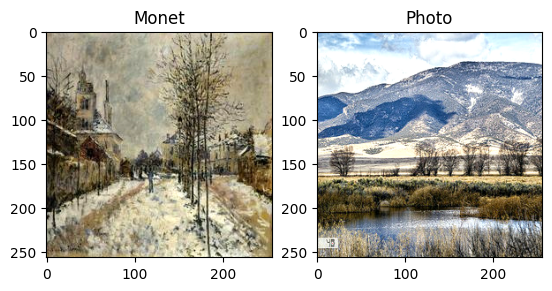

In [9]:
plt.subplot(1, 2, 1)
plt.title('Monet')
plt.imshow(example_monet[0]* 0.6 + 0.6)

photo = example_photo[0]
plt.subplot(1, 2, 2)
plt.title('Photo')
plt.imshow(example_photo[0] * 0.6 + 0.6)
plt.show()

# Build the Generator in a CycleGan

### Define methods for UNet architecture for CycleGan

Downsampling, or pooling, reduces the spatial dimensions of the input data while retaining important features. The function utilizes a 2D convolutional layer to perform spatial convolutions and reduce the input size. It also includes an optional step of applying instance normalization to improve stability and performance. The addition of a leaky rectified linear unit (LeakyReLU) activation function introduces non-linearity to the network. Proper weight initialization techniques ensure suitable initial weights for the model. 

In [10]:
def downsample(filters, size, apply_instancenorm=True):
    # allow you to pre-specify an initialization strategy, encoded in the Initializer object, without knowing the shape and dtype of the variable being initialized.
    initializer = tf.random_normal_initializer(0., 0.02)
    # initializer that generates tensors with a normal distribution
    gamma_init = keras.initializers.RandomNormal(mean=0.0, stddev=0.02)
    
    # appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor
    result = keras.Sequential()
    # 2D convolution layer (e.g. spatial convolution over images)
    result.add(layers.Conv2D(filters, 
                             size, 
                             strides=2, 
                             padding='same', 
                             kernel_initializer=initializer, 
                             use_bias=False
                            )
              )
    
    if apply_instancenorm:
        result.add(tfa.layers.InstanceNormalization(gamma_initializer=gamma_init))
        
    result.add(layers.LeakyReLU())
    
    return result

The `upsample()` function in the provided code is a vital component of a convolutional neural network (CNN) architecture. It performs upsampling operations by using transpose convolutions to increase the spatial dimensions of the input data. Additionally, it incorporates instance normalization for improved stability, optional dropout regularization for preventing overfitting, and the ReLU activation function for introducing non-linearity. The function's importance lies in facilitating effective feature reconstruction, enhancing model performance, and generating high-quality outputs. Overall, the `upsample()` function plays a crucial role in the success of your CNN model for tasks such as image generation or semantic segmentation.

In [11]:
def upsample(filters, size, apply_dropout=False):
    initializer = tf.random_normal_initializer(0., 0.02)
    gamma_init = keras.initializers.RandomNormal(mean=0.0, stddev=0.02)
    
    result = keras.Sequential()
    result.add(layers.Conv2DTranspose(filters, 
                                      size, 
                                      strides=2, 
                                      padding='same', 
                                      kernel_initializer=initializer, 
                                      use_bias=False
                                     )
              )
    
    result.add(tfa.layers.InstanceNormalization(gamma_initializer=gamma_init))
    
    if apply_dropout: 
        result.add(layers.Dropout(0.5))
        
    result.add(layers.ReLU())
    
    return result

### Define the generator 

The `Generator()` function in the provided code plays a crucial role in a generative adversarial network (GAN) architecture. It constructs the generator model responsible for generating realistic output images. The function defines sequences of downsample and upsample operations to capture hierarchical features and reconstruct high-resolution images. It incorporates skip connections to preserve important features and utilizes transpose convolutions for upsampling. The function's importance lies in its contribution to the GAN framework by generating high-quality images and enabling adversarial training.

In [12]:
def Generator(channels = 3, res_filters=256):
    inputs = layers.Input(shape=[res_filters,res_filters, channels])
    
    # bs = batch size 
    down_stack = [
        downsample(64, 4, apply_instancenorm=False), 
        downsample(128, 4),
        downsample(res_filters, 4), 
        downsample(512, 4), 
        downsample(512, 4), 
        downsample(512, 4), 
        downsample(512, 4),
        downsample(512, 4), 
    ]
    
    up_stack = [
        upsample(512, 4, apply_dropout=True), 
        upsample(512, 4, apply_dropout=True),
        upsample(512, 4, apply_dropout=True),
        upsample(512, 4),
        upsample(res_filters, 4),
        upsample(128, 4),
        upsample(64, 4),
    ]
    
    initializer = tf.random_normal_initializer(0., 0.02)
    last = layers.Conv2DTranspose(filters=channels, 
                                  kernel_size=4, 
                                  strides=2, 
                                  padding='same', 
                                  kernel_initializer=initializer, 
                                  activation='tanh'
                                 )
    
    x = inputs 
    
    # downsample through the model
    skips = []
    for down in down_stack:
        x = down(x)
        skips.append(x)
        
    skips = reversed(skips[:-1])
    
    # upsample and stablish skip connections 
    for up, skip in zip(up_stack, skips):
        x = up(x)
        x = layers.Concatenate()([x, skip])
        
    x = last(x)
    
    return keras.Model(inputs=inputs, outputs=x)

In [13]:
g = Generator() # Initialize a Generator model
g.summary() # get a Generator summary
del g # free up RAM 

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 sequential (Sequential)        (None, 128, 128, 64  3072        ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 sequential_1 (Sequential)      (None, 64, 64, 128)  131328      ['sequential[0][0]']             
                                                                                              

### Build the discriminator 

The `Discriminator()` function in the provided code plays a critical role in a generative adversarial network (GAN) architecture. It constructs the discriminator model responsible for distinguishing real and generated images. The function incorporates downsample operations, convolutional layers, instance normalization, leaky ReLU activation, and appropriate weight initialization. The discriminator's purpose is vital in the GAN framework as it learns to differentiate between real and generated images. By utilizing these operations and components, the `Discriminator()` function enables the discriminator model to effectively capture and discriminate high-level image features.

In [14]:
def Discriminator(channels=3, res_filters=256, conv_filters=None):
    initializer = tf.random_normal_initializer(0., 0.02)
    gamma_init = keras.initializers.RandomNormal(mean=0.0, stddev=0.02)
    
    inp = layers.Input(shape=[res_filters, res_filters, channels], name='input_image')
    
    x = inp
    
    down1 = downsample(64, 4, False)(x)
    down2 = downsample(128, 4)(down1)
    down3 = downsample(256, 4)(down2)
    
    zero_pad1 = layers.ZeroPadding2D()(down3)
    conv = layers.Conv2D(512, 4, strides=1, kernel_initializer=initializer, use_bias=False)(zero_pad1)
    
    norm1 = tfa.layers.InstanceNormalization(gamma_initializer=gamma_init)(conv)
    
    leaky_relu = layers.LeakyReLU()(norm1)
    
    zero_pad2 = layers.ZeroPadding2D()(leaky_relu)
    
    last = layers.Conv2D(filters=1, 
                         kernel_size=4, 
                         strides=1, 
                         kernel_initializer=initializer
                        )(zero_pad2)
    
    return tf.keras.Model(inputs=inp, outputs=last)

## Initialize a Discriminator model

In [15]:
d = Discriminator() # Initialize a Discriminator model 
d.summary() # get a Discriminator summary
del d # free up RAM 

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_image (InputLayer)    [(None, 256, 256, 3)]     0         
                                                                 
 sequential_15 (Sequential)  (None, 128, 128, 64)      3072      
                                                                 
 sequential_16 (Sequential)  (None, 64, 64, 128)       131328    
                                                                 
 sequential_17 (Sequential)  (None, 32, 32, 256)       524800    
                                                                 
 zero_padding2d (ZeroPadding  (None, 34, 34, 256)      0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 31, 31, 512)       2097152   
                                                           

In [16]:
with strategy.scope():
    monet_generator = Generator() # transforms photos to Monet-esque paintings
    photo_generator = Generator() # transforms Monet paintings to photo-like 
    
    monet_discriminator = Discriminator() # differentiates real Monet paintings
    photo_discriminator = Discriminator() # differentiates real photos

# Build the CycleGAN model 

Define a CycleGan model
- Generator and Discriminator for the Monet paintings
- Generator and Discriminator for the real-life photos

The forward pass takes a real-life photo and a Monet painting:

Step 1: 
- converts the real-life photo to Monet-esque painting using the generator for Monet paintings in```fake_monet```
- converts the Monet painting to real-life photo using the generator for real-life photos in```fake_photo```

Step 2: 
- recreates the real-life photo from ```fake_monet``` in ```cycled_photo```
- recreates the Monet painting from ```fake_photo``` in ```cycled_monet```

Step 3: 
- passes real Monet painting through Monet generator to test how good the generator is at recognizing its own paintings in  ``identity_monet```
- passes real photo through real-life photo generator to test how good the generator is at recognizing its own photos in ``identity_photo```

Step 4: 
- Classifies the real Monet painting using the Monet paintings discriminator. Expected output should be close to 1 in ```discriminated_real_monet``` since Monet painting is not generated.
- Classifies the real real-life photo using the real-life photo discriminator. Expected output should be close to 1 in ```discriminated_real_photo``` since real-life photo is not generated.

Step 5:
- Classifies the fake Monet painting ```fake_monet``` using the Monet paintings discriminator. Expected output should be close to 0 in ```discriminated_fake_monet``` since ```fake_monet``` is generated.
- Classifies the fake real-life photo ```fake_photo``` using the real-life photo discriminator. Expected output should be close to 0 in ```discriminated_fake_photo``` since ```fake_photo``` is generated.

Outputs are returned in a dictionary.

In [17]:
class CycleGan(keras.Model):
    
    def __init__( 
        self, 
        monet_generator, 
        photo_generator, 
        monet_discriminator, 
        photo_discriminator, 
        lambda_cycle=10,  
    ): 
        super(CycleGan, self).__init__()
        self.monet_generator = monet_generator
        self.photo_generator = photo_generator
        self.monet_discriminator = monet_discriminator 
        self.photo_discriminator = photo_discriminator
        self.lambda_cycle = lambda_cycle
        
    def compile(
        self, 
        m_gen_optimizer, 
        p_gen_optimizer, 
        m_disc_optimizer, 
        p_disc_optimizer,
        gen_loss_fn, 
        disc_loss_fn, 
        cycle_loss_fn, 
        identity_loss_fn
    ):
        super(CycleGan, self).compile()
        self.m_gen_optimizer = m_gen_optimizer
        self.p_gen_optimizer = p_gen_optimizer
        self.m_disc_optimizer = m_disc_optimizer
        self.p_disc_optimizer = p_disc_optimizer
        self.gen_loss_fn = gen_loss_fn
        self.disc_loss_fn = disc_loss_fn
        self.cycle_loss_fn = cycle_loss_fn
        self.identity_loss_fn = identity_loss_fn
    
    def train_step(self, batch_data):
        real_monet, real_photo = batch_data
        
        with tf.GradientTape(persistent=True) as tape:
            # photo -> monet -> photo
            fake_monet = self.monet_generator(real_photo, training=True)
            cycled_photo = self.photo_generator(fake_monet, training=True)
            
            # monet -> photo -> monet 
            fake_photo = self.photo_generator(real_monet, training=True)
            cycled_monet = self.monet_generator(fake_photo, training=True)
            
            # painting & photo generating themselves
            identity_monet = self.monet_generator(real_monet, training=True)
            identity_photo = self.photo_generator(real_photo, training=True)
            
            # discriminator used to check, inputing real images
            discriminated_real_monet = self.monet_discriminator(real_monet, training=True)
            discriminated_real_photo = self.photo_discriminator(real_photo, training=True)
            
            # discriminator used to check, inputing fake images
            discriminated_fake_monet = self.monet_discriminator(fake_monet, training=True)
            discriminated_fake_photo = self.photo_discriminator(fake_photo, training=True)
            
            # evaluate generator loss
            monet_gen_loss = self.gen_loss_fn(discriminated_fake_monet)
            photo_gen_loss = self.gen_loss_fn(discriminated_fake_photo)
            
            # evaluate total cycle consistency loss
            total_cycle_loss = self.cycle_loss_fn(real_monet, cycled_monet, self.lambda_cycle) + self.cycle_loss_fn(real_photo, cycled_photo, self.lambda_cycle)
            
            # evaluates total generator loss
            total_monet_gen_loss = monet_gen_loss + total_cycle_loss + self.identity_loss_fn(real_monet, identity_monet, self.lambda_cycle)
            total_photo_gen_loss = photo_gen_loss + total_cycle_loss + self.identity_loss_fn(real_photo, identity_photo, self.lambda_cycle)
            
            # evaluate discriminator loss 
            monet_disc_loss = self.disc_loss_fn(discriminated_real_monet, discriminated_fake_monet)
            photo_disc_loss = self.disc_loss_fn(discriminated_real_photo, discriminated_fake_photo)
            
            # calculate gradients for generator and discriminator
            monet_generator_gradients = tape.gradient(total_monet_gen_loss, self.monet_generator.trainable_variables)
            photo_generator_gradients = tape.gradient(total_photo_gen_loss, self.monet_generator.trainable_variables)
            monet_discriminator_gradients = tape.gradient(monet_disc_loss, self.monet_discriminator.trainable_variables)
            photo_discriminator_gradients = tape.gradient(photo_disc_loss, self.photo_discriminator.trainable_variables)
           
            # apply gradients to optimizer
            self.m_gen_optimizer.apply_gradients(zip(monet_generator_gradients, self.monet_generator.trainable_variables))
            self.p_gen_optimizer.apply_gradients(zip(photo_generator_gradients, self.photo_generator.trainable_variables))
            self.m_disc_optimizer.apply_gradients(zip(monet_discriminator_gradients, self.monet_discriminator.trainable_variables))
            self.p_disc_optimizer.apply_gradients(zip(photo_discriminator_gradients, self.photo_discriminator.trainable_variables))
            
            return {
                "monet_gen_loss": total_monet_gen_loss, 
                "photo_gen_loss": total_photo_gen_loss, 
                "monet_disc_loss": monet_disc_loss, 
                "photo_disc_loss": photo_disc_loss    
            } 

## Initialize a ```CycleGAN``` model

In [18]:
gan = CycleGan(monet_generator = monet_generator, 
               photo_generator = photo_generator, 
               monet_discriminator = monet_discriminator,
               photo_discriminator = photo_discriminator)

# Define loss functions


In the GAN framework, the discriminator plays a crucial role as a binary classifier, distinguishing between real and generated images. To train the discriminator effectively, it is necessary to define an appropriate loss function. In this case, the discriminator loss is computed as the sum of the binary cross entropy loss for the real image and the fake image.

The binary cross entropy loss is a widely used loss function for binary classification tasks. It measures the dissimilarity between the predicted probabilities and the ground truth labels. For the discriminator, the real image is labeled as "real" with a target value of 1, while the fake image generated by the generator is labeled as "fake" with a target value of 0.

By calculating the binary cross entropy loss separately for the real and fake images and summing them, the discriminator loss encourages the discriminator to accurately classify both types of images. Minimizing this loss during training pushes the discriminator towards better discrimination performance, enabling it to differentiate between real and generated images more effectively.

The choice of binary cross entropy loss for the discriminator is well-suited for GANs, as it provides a straightforward and effective way to guide the discriminator's learning process. The loss function promotes a more discriminative discriminator, which is essential for achieving the adversarial training dynamics necessary for successful image generation.

In [19]:
with strategy.scope():
    def discriminator_loss(real, generated):
        real_loss = tf.keras.losses.BinaryCrossentropy(from_logits=True, reduction=tf.keras.losses.Reduction.NONE)(tf.ones_like(real), real)
        
        generated_loss = tf.keras.losses.BinaryCrossentropy(from_logits=True, reduction=tf.keras.losses.Reduction.NONE)(tf.zeros_like(generated), generated)
        
        total_disc_loss = real_loss + generated_loss
        
        return total_disc_loss * 0.5

In [20]:
with strategy.scope():
    def generator_loss(generated):
        
        return tf.keras.losses.BinaryCrossentropy(from_logits=True, reduction=tf.keras.losses.Reduction.NONE)(tf.ones_like(generated), generated)

### Define the cycle consistency loss
The cycle consistency loss is a significant component in cycle-consistent generative adversarial network (CycleGAN) architectures. It serves the purpose of maintaining the consistency between the original input image and the reconstructed image obtained through the cycle-consistency constraint. This loss is calculated using the L1 norm, also known as the mean absolute error.

By measuring the L1 norm between the cycled image and the original image, the cycle consistency loss quantifies the discrepancy between the two. It provides a metric to assess how far the reconstructed image deviates from the original input. The L1 norm is particularly suitable for this task as it considers the absolute differences between corresponding pixels, capturing both magnitude and direction

In [21]:
with strategy.scope():
    def calc_cycle_loss(real_image, cycled_image, LAMBDA):
        loss = tf.reduce_mean(tf.abs(real_image - cycled_image))
        return LAMBDA * loss

### Define the identity loss
The identity loss is an integral component in image translation tasks, such as in cycle-consistent generative adversarial network (CycleGAN) architectures. It serves the purpose of preserving the identity of an image during the translation process. Specifically, the identity loss measures the dissimilarity between the identity image and the original image.

By quantifying the discrepancy between the identity image and the original input, the identity loss provides a metric to assess how much the translated image deviates from the original content. The goal is to minimize this loss, as a lower value indicates a closer resemblance between the generated image and the original input. This preservation of identity ensures that the essential characteristics and details of the original image are retained in the translated output.

In [22]:
with strategy.scope():
    def identity_loss(real_image, same_image, LAMBDA):
        loss = tf.reduce_mean(tf.abs(real_image - same_image))
        return LAMBDA * 0.5 * loss

### Initialize tensorflow optimizers and Compile the Model

In [23]:
with strategy.scope():
    monet_generator_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)
    photo_generator_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)
    
    monet_discriminator_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)
    photo_discriminator_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)

### Initialize CycleGAN model

In [31]:
with strategy.scope():
    cycle_gan_model = CycleGan(monet_generator, photo_generator, monet_discriminator, photo_discriminator)
    
    cycle_gan_model.compile(
        m_gen_optimizer = monet_generator_optimizer,
        p_gen_optimizer = photo_generator_optimizer,
        m_disc_optimizer = monet_discriminator_optimizer,
        p_disc_optimizer = photo_discriminator_optimizer,
        gen_loss_fn = generator_loss,
        disc_loss_fn = discriminator_loss, 
        cycle_loss_fn = calc_cycle_loss, 
        identity_loss_fn = identity_loss
    )

# Run CycleGAN model on the datasets!

In [32]:
history = cycle_gan_model.fit(
    tf.data.Dataset.zip((monet_ds, photo_ds)), 
    epochs=25
)

Epoch 1/25


2023-07-14 06:16:38.683910: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignAddVariableOp.
2023-07-14 06:16:40.386835: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignAddVariableOp.


300/300 [==============================] - 75s 123ms/step - monet_gen_loss: 12.5371 - photo_gen_loss: 22.7445 - monet_disc_loss: 0.5207 - photo_disc_loss: 6.2838e-04
Epoch 2/25
300/300 [==============================] - 37s 122ms/step - monet_gen_loss: 12.6104 - photo_gen_loss: 22.9719 - monet_disc_loss: 0.4984 - photo_disc_loss: 5.3209e-04
Epoch 3/25
300/300 [==============================] - 36s 121ms/step - monet_gen_loss: 12.6359 - photo_gen_loss: 23.2115 - monet_disc_loss: 0.4941 - photo_disc_loss: 4.6193e-04
Epoch 4/25
300/300 [==============================] - 37s 122ms/step - monet_gen_loss: 12.6712 - photo_gen_loss: 23.4042 - monet_disc_loss: 0.4816 - photo_disc_loss: 4.0355e-04
Epoch 5/25
300/300 [==============================] - 36s 121ms/step - monet_gen_loss: 12.5427 - photo_gen_loss: 23.3203 - monet_disc_loss: 0.5055 - photo_disc_loss: 3.6262e-04
Epoch 6/25
300/300 [==============================] - 37s 122ms/step - monet_gen_loss: 12.5047 - photo_gen_loss: 22.4406 - mon

### Loss Curve
- Visualize the loss curves for the generators and discriminators

In [33]:
# Calculate the mean loss per epoch
keys = ["photo_gen_loss", "photo_disc_loss", "monet_gen_loss", "monet_disc_loss"]

epoch_history = {"photo": {}, "monet": {}}

for key in keys:
    img_type, model, _ = key.split("_")
    epoch_history[img_type][model] = np.array(
        [tf.reduce_mean(loss).numpy() for loss in history.history[key]]
    )

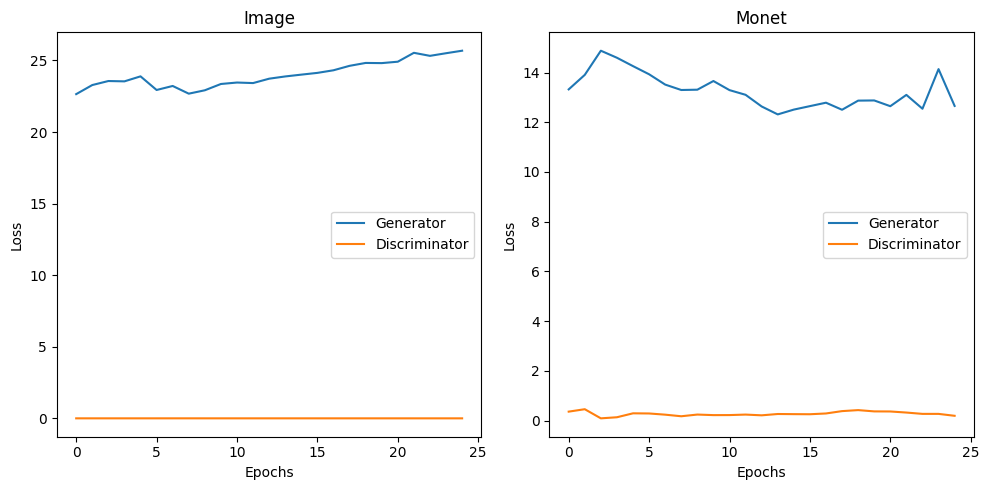

In [34]:
titles = {"photo": "Image", "monet": "Monet"}

f, axs = plt.subplots(1, len(epoch_history), figsize=(10, 5))

for (key, losses), ax in zip(epoch_history.items(), axs.flatten()):
    ax.plot(epoch_history[key]["gen"], label="Generator")
    ax.plot(epoch_history[key]["disc"], label="Discriminator")
    ax.set_xlabel("Epochs")
    ax.set_ylabel("Loss")
    ax.set_title(titles[key])
    ax.legend()

plt.tight_layout()

# Visualize Monet-esque photos

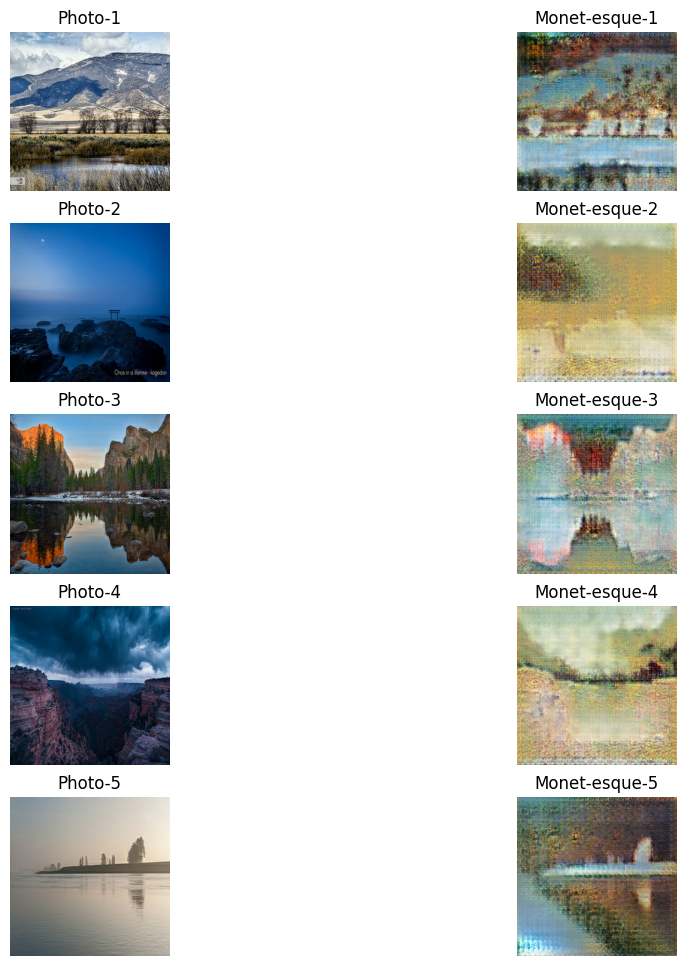

In [35]:
f, ax = plt.subplots(5, 2, figsize=(12, 12))
for i, img in enumerate(photo_ds.take(5)):
    prediction = monet_generator(img, training=False)[0].numpy()
    prediction = (prediction * 127.5 + 127.5).astype(np.uint8)
    img = (img[0] * 127.5 + 127.5).numpy().astype(np.uint8)
    
    ax[i, 0].imshow(img)
    ax[i, 1].imshow(prediction)
    ax[i, 0].set_title(f"Photo-{i + 1}")
    ax[i, 1].set_title(f"Monet-esque-{i + 1}")
    ax[i, 0].axis("off")
    ax[i, 1].axis("off")
    
plt.show()